# Natural Disasters Analysis Worldwide
**Group Project in the RSE 2024 Course.**

This project aims to analyze and visualize the impacts of natural disasters worldwide using the EMDAT dataset. By exploring this data, we will address the following questions:
- **What is the trend of total affected populations over the years?**
- **How do the numbers of injuries and deaths compare over the years?**
- **Which types of disasters have the most significant impacts in terms of fatalities populations?**


## Why This Topic?
**Analyzing natural disaster data is crucial for various reasons:**
- **Planning and Policy Development:** Helps governments and organizations to develop better policies and emergency response plans.
- **Resource Allocation:** Assists in efficiently allocating resources for disaster preparedness and relief.
- **Public Health and Safety:** Provides insights to improve public health and safety measures.
- **Economic Forecasting:** Aids in forecasting economic impacts and planning for recovery.

Understanding the impacts of natural disasters can provide valuable insights for improving resilience and mitigating future risks.

## Let's Talk about Data
The dataset used for this analysis is from the EMDAT database, which provides detailed information on natural disasters worldwide. The data includes metrics such as total affected, injuries, deaths, and disaster types over the years.

- **Source:** EMDAT database
- **Data Format:** Excel file




## Let's Start:

#### Data Preprocessing
Before diving into the analysis, we need to preprocess the data to ensure it is clean and ready for visualization. This includes handling missing values, converting data types, and creating necessary columns.

In [1]:
!pip install statsmodels


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Importing the libraries

import importlib
import os
import sys
import pandas as pd
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

# Add src directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), 'src')))

from helper_functions import load_data, clean_data, data_preprocessing

from geological_analysis.calculate_natural_disaster_changes import calculate_natural_disaster_changes
from geological_analysis.draw_choropleth_map import draw_choropleth_map
from geological_analysis.plot_animated_earthquakes import plot_animated_earthquakes
from geological_analysis.plot_disaster_trend import plot_disaster_trend


from administrative_responses.describe_data import describe_data
from administrative_responses.plot_administrative_responses import plot_administrative_responses
from administrative_responses.compare_by_region import compare_by_region
from administrative_responses.t_test_response import t_test_response
from administrative_responses.sample_and_regress import sample_and_regress

In [3]:
# Load the dataset
file_path = '../data/rse.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1999-9388-DJI       No    nat-cli-dro-dro        Natural    Climatological   
1  1999-9388-SDN       No    nat-cli-dro-dro        Natural    Climatological   
2  1999-9388-SOM       No    nat-cli-dro-dro        Natural    Climatological   
3  2000-0001-AGO       No    tec-tra-roa-roa  Technological         Transport   
4  2000-0002-AGO       No    nat-hyd-flo-riv        Natural      Hydrological   

  Disaster Type Disaster Subtype External IDs Event Name  ISO  ...  \
0       Drought          Drought          NaN        NaN  DJI  ...   
1       Drought          Drought          NaN        NaN  SDN  ...   
2       Drought          Drought          NaN        NaN  SOM  ...   
3          Road             Road          NaN        NaN  AGO  ...   
4         Flood   Riverine flood          NaN        NaN  AGO  ...   

  Reconstruction Costs ('000 US$) Reconstruction Costs, Adjusted ('000 US$)  \
0                             NaN                                       NaN   
1                             NaN                                       NaN   
2                             NaN                                       NaN   
3                             NaN                                       NaN   
4                             NaN                                       NaN   

  Insured Damage ('000 US$) Insured Damage, Adjusted ('000 US$)  \
0                       NaN                                 NaN   
1                       NaN                                 NaN   
2                       NaN                                 NaN   
3                       NaN                                 NaN   
4                       NaN                                 NaN   

  Total Damage ('000 US$) Total Damage, Adjusted ('000 US$)        CPI  \
0                     NaN                               NaN  58.111474   
1                     NaN                               NaN  56.514291   
2                     NaN                               NaN  56.514291   
3                     NaN                               NaN  56.514291   
4                 10000.0                           17695.0  56.514291   

                                         Admin Units  Entry Date  Last Update  
0  [{"adm1_code":1093,"adm1_name":"Ali Sabieh"},{...  2006-03-01   2023-09-25  
1  [{"adm1_code":2757,"adm1_name":"Northern Darfu...  2006-03-08   2023-09-25  
2  [{"adm1_code":2691,"adm1_name":"Bay"},{"adm1_c...  2006-03-08   2023-09-25  
3                                                NaN  2004-10-27   2023-09-25  
4  [{"adm2_code":4214,"adm2_name":"Baia Farta"},{...  2005-02-03   2023-09-25  

[5 rows x 46 columns]

## Trend of affected over years due natural disasters

In [4]:
def check_required_columns(data, required_columns):
    missing_columns = [col for col in required_columns if col not in data.columns]
    if missing_columns:
        print(f"Missing required columns: {', '.join(missing_columns)}")
        return False
    return True



Total Affected Over Years:
 Start Year  Total Affected
       2000     174274727.0
       2001     109022629.0
       2002     659461666.0
       2003     255757731.0
       2004     162189672.0
       2005     160782980.0
       2006     126502913.0
       2007     212882686.0
       2008     221870697.0
       2009     201822893.0
       2010     259997715.0
       2011     212822276.0
       2012     123500944.0
       2013      99407666.0
       2014     142978486.0
       2015     431946986.0
       2016     205473356.0
       2017     104241997.0
       2018      84066832.0
       2019     109222323.0
       2020     103773127.0
       2021     119259888.0
       2022     186173109.0
       2023      94455675.0
       2024      58636438.0


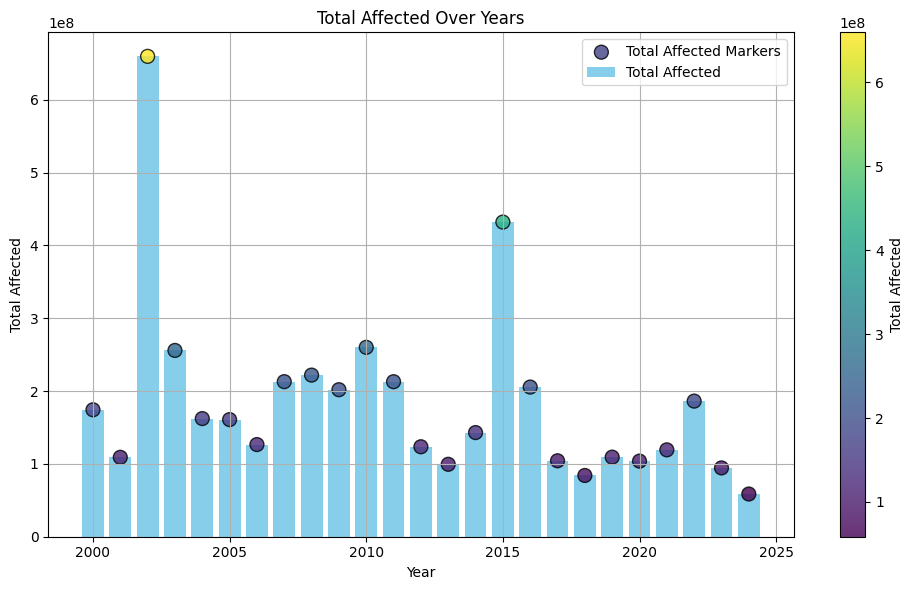

In [5]:
def plot_total_affected_over_years(data):
    """
    Plot the total affected over years using matplotlib, and print the data in a table.

    data: DataFrame containing the EMDAT dataset with relevant columns.
    """
    required_columns = ['Start Year', 'Total Affected']
    if not check_required_columns(data, required_columns):
        return
    
    data_grouped = data.groupby('Start Year')['Total Affected'].sum().reset_index()

    # Plotting using matplotlib
    plt.figure(figsize=(10, 6))
    
    # Bar plot
    plt.bar(data_grouped['Start Year'], data_grouped['Total Affected'], color='skyblue', label='Total Affected')

    # Scatter plot (markers)
    plt.scatter(data_grouped['Start Year'], data_grouped['Total Affected'], c=data_grouped['Total Affected'], cmap='viridis', s=100, edgecolor='k', alpha=0.8, label='Total Affected Markers')
    
    plt.colorbar(label='Total Affected')
    
    plt.xlabel('Year')
    plt.ylabel('Total Affected')
    plt.title('Total Affected Over Years')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Print the table of data
    print("\nTotal Affected Over Years:")
    print(data_grouped.to_string(index=False))

    # Save the plot as an image (optional)
    plt.savefig('plot_total_affected_over_years.png')

    # Show the plot
    plt.show()

plot_total_affected_over_years(data)

## Total Affected Over Years

The plot above illustrates the total number of individuals affected by natural disasters over the years, based on the EMDAT dataset. Here are some key observations from the data:

- In the early 2000s, the number of affected individuals was relatively high, with a peak around 659 million in 2002.
- There is noticeable variability in the number of affected individuals from year to year, reflecting the variability in the occurrence and severity of natural disasters.
- From 2010 onwards, there appears to be a fluctuating pattern in the total affected populations, with significant spikes in certain years (e.g., 2015 with over 431 million affected) and dips in others.
- The data shows a general trend of fluctuation and variability, influenced by various natural disaster events such as floods, earthquakes, and storms.

## Injured & deaths over years

In [6]:
def plot_injured_and_deaths_over_years(data):
    """
    Plot the number of injured and deaths over years using a line plot with markers, and print the data in a table.
    
    data: DataFrame containing the EMDAT dataset with relevant columns.
    """
    # Check if required columns exist for injuries
    required_columns_injured = ['Start Year', 'No. Injured']
    if not check_required_columns(data, required_columns_injured):
        return

    # Check if required columns exist for deaths
    required_columns_deaths = ['Start Year', 'Total Deaths']
    if not check_required_columns(data, required_columns_deaths):
        return

    # Group data by Start Year and calculate sum of No. Injured and Total Deaths
    data_grouped_injured = data.groupby('Start Year')['No. Injured'].sum().reset_index()
    data_grouped_deaths = data.groupby('Start Year')['Total Deaths'].sum().reset_index()

    # Plotting using matplotlib
    plt.figure(figsize=(10, 6))

    # Line plot with markers for Injured
    plt.plot(data_grouped_injured['Start Year'], data_grouped_injured['No. Injured'], marker='o', linestyle='-', color='skyblue', label='Total Injured')

    # Line plot with markers for Deaths
    plt.plot(data_grouped_deaths['Start Year'], data_grouped_deaths['Total Deaths'], marker='o', linestyle='-', color='salmon', label='Total Deaths')

    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Comparison of Injuries and Deaths Over Years')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Print the table of data
    print("\nInjuries and Deaths Over Years:")
    print("Injuries:")
    print(data_grouped_injured.to_string(index=False))
    print("\nDeaths:")
    print(data_grouped_deaths.to_string(index=False))

    # Save the plot as an image (optional)
    plt.savefig('plot_injured_and_deaths_over_years.png')

    # Show the plot
    plt.show()


Injuries and Deaths Over Years:
Injuries:
 Start Year  No. Injured
       2000      31236.0
       2001     288401.0
       2002      61377.0
       2003     214644.0
       2004    1896449.0
       2005     172386.0
       2006     175061.0
       2007      78571.0
       2008     400913.0
       2009      52589.0
       2010     746828.0
       2011      56590.0
       2012      74551.0
       2013     129357.0
       2014     111607.0
       2015     202862.0
       2016     172073.0
       2017     261706.0
       2018     290139.0
       2019    1265869.0
       2020      21705.0
       2021     151558.0
       2022     168346.0
       2023     309217.0
       2024       9558.0

Deaths:
 Start Year  Total Deaths
       2000       28047.0
       2001       48008.0
       2002       34393.0
       2003      124308.0
       2004      255045.0
       2005      105108.0
       2006       39758.0
       2007       30057.0
       2008      248936.0
       2009       22924.0
       2010 

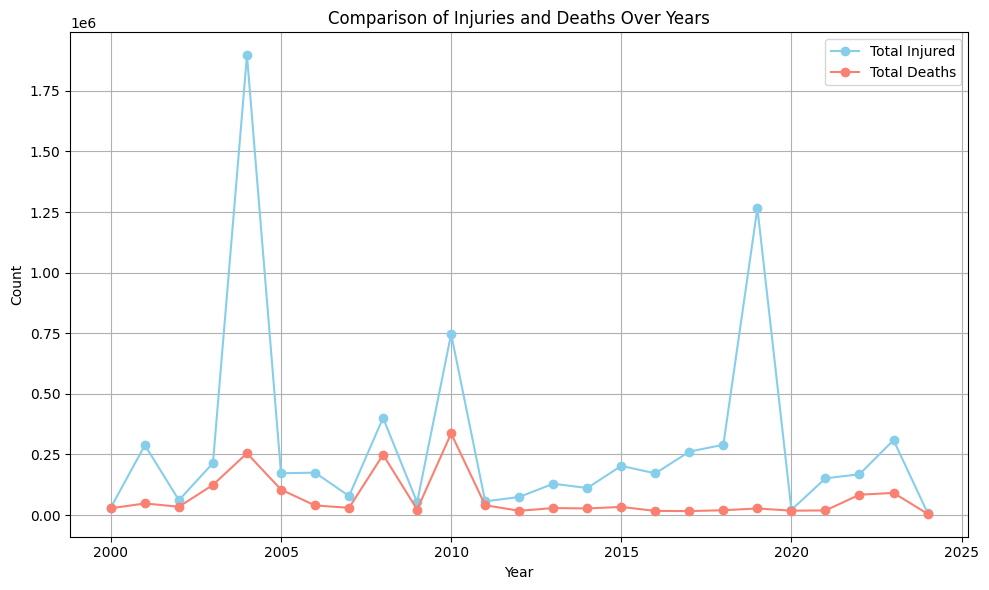

In [7]:
plot_injured_and_deaths_over_years(data)

## Analysis of Injuries and Deaths Over Years

### Injuries:
Injuries show considerable variability across different years, with significant peaks observed in certain years:

- **2004**: Notably stands out with a substantial number of injuries (1,896,449).
- **2019**: Another peak year with a high number of injuries (1,265,869).
- **2010**: Also shows a significant number of injuries (746,828).

These peaks might correspond to specific events or periods of heightened disaster activity, warranting further investigation into the causes and contexts.

### Deaths:
The data on deaths also exhibits fluctuation over the years:

- **2003**: Stands out with a high number of deaths (124,308), possibly due to significant disasters.
- **2010**: Another peak year for deaths (336,647).
- **2022**: Shows a notable increase in deaths (83,926).

Each of these peaks could reflect major disasters or events that resulted in loss of life. Understanding the circumstances surrounding these peaks can provide insights into disaster response and mitigation strategies.

### Overall Trends:
- **Variability**: Both injuries and deaths show year-to-year variability, indicating the unpredictable nature of disasters and their impacts.
- **Response and Preparedness**: Peaks in injuries and deaths highlight the importance of effective disaster response, preparedness, and resilience-building measures.
- **Data Analysis**: Continual monitoring and analysis of such data are crucial for identifying trends, patterns, and areas for improvement in disaster management practices.


## Analysis of Total Deaths by Disaster Type

In [8]:
def plot_deaths_by_disaster_type(data):
    """
    Plot the total fatalities by disaster type using a grouped bar chart.

    data: DataFrame containing the EMDAT dataset with relevant columns.
    """
    # Check if required columns exist
    required_columns = ['Disaster Type', 'Total Deaths']
    if not check_required_columns(data, required_columns):
        return

    # Group data by Disaster Type and calculate sum of total deaths
    data_grouped = data.groupby('Disaster Type')['Total Deaths'].sum().reset_index()

    # Plotting using matplotlib
    plt.figure(figsize=(12, 8))

    # Number of disaster types
    num_types = len(data_grouped)

    # Bar width
    bar_width = 0.4

    # Calculate x positions for each bar
    x_positions = np.arange(num_types)

    # Plotting total deaths
    plt.bar(x_positions, data_grouped['Total Deaths'], width=bar_width, color='lightcoral', label='Total Deaths')

    # Adding labels, title, and legend
    plt.xlabel('Disaster Type')
    plt.ylabel('Count')
    plt.title('Total Deaths by Disaster Type')
    plt.xticks(x_positions, data_grouped['Disaster Type'], rotation=45, ha='right')
    plt.legend()

    plt.tight_layout()

    # Show plot
    plt.show()

    # Print data for analysis
    print("\nTotal Deaths by Disaster Type:")
    print(data_grouped.to_string(index=False))

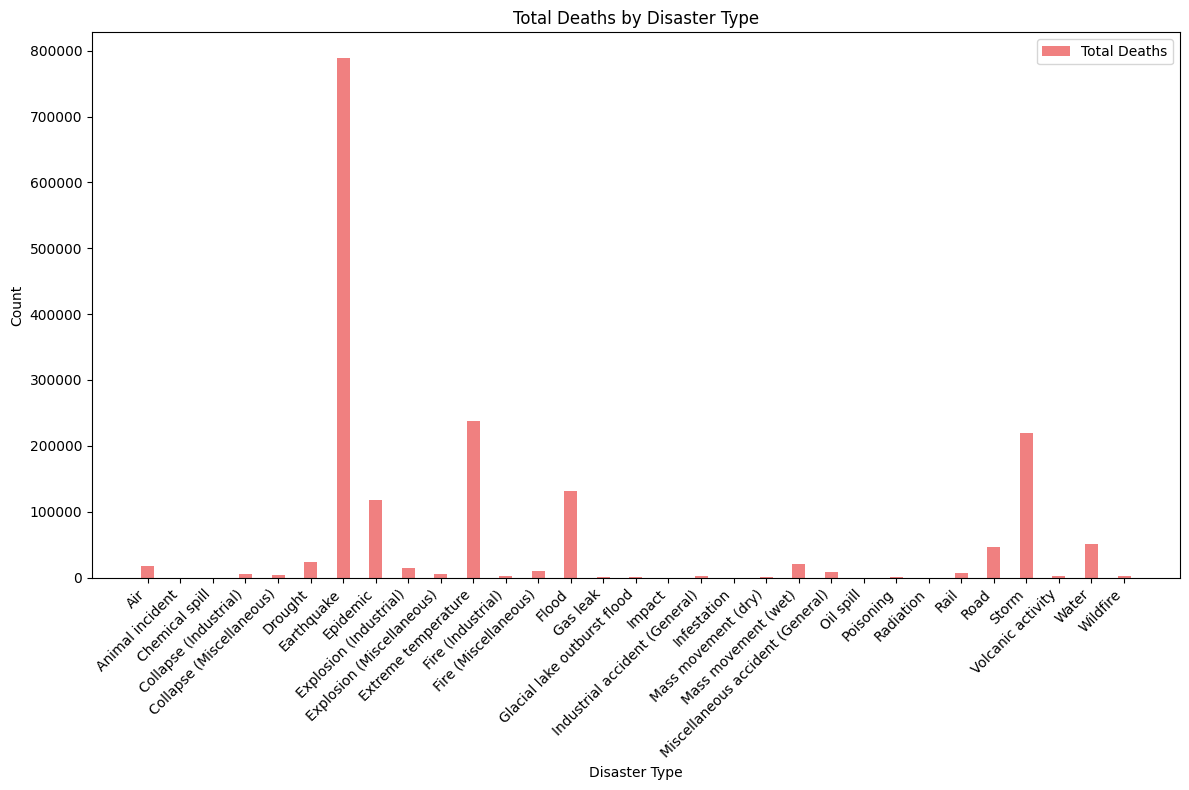


Total Deaths by Disaster Type:
                   Disaster Type  Total Deaths
                             Air       16844.0
                 Animal incident          12.0
                  Chemical spill          46.0
           Collapse (Industrial)        5503.0
        Collapse (Miscellaneous)        4491.0
                         Drought       24160.0
                      Earthquake      788400.0
                        Epidemic      118149.0
          Explosion (Industrial)       14025.0
       Explosion (Miscellaneous)        5524.0
             Extreme temperature      237083.0
               Fire (Industrial)        2815.0
            Fire (Miscellaneous)       10552.0
                           Flood      132139.0
                        Gas leak         300.0
     Glacial lake outburst flood         439.0
                          Impact           0.0
   Industrial accident (General)        2489.0
                     Infestation           0.0
             Mass movement (

In [9]:
plot_deaths_by_disaster_type(data)

### Conclusion of Analysis of Total Deaths by Disaster Type

The analysis reveals significant insights into the impact of various types of disasters in terms of total deaths. Key observations include:

- **Earthquake**: Stands out as the deadliest disaster type with 788,400 deaths, highlighting the catastrophic consequences of seismic events.
  
- **Extreme Temperature**: Causes a substantial number of deaths (237,083), emphasizing the lethal effects of extreme heat and cold events.

- **Flood**: Leads to a significant loss of life (132,139 deaths), indicating the widespread devastation caused by flooding disasters.

Each disaster type demonstrates unique characteristics in terms of fatalities, underscoring the critical importance of disaster preparedness, early warning systems, and mitigation strategies to minimize human casualties. Analyzing these patterns can guide effective disaster response and resilience-building efforts to safeguard lives in the face of natural and man-made disasters.


# Analysis of Administrative Responses to Natural Disasters

This notebook analyzes how different administrative responses impact the outcomes of natural disasters across various regions and disaster types. We will focus on the following questions:
- How do the presence and type of administrative responses (OFDA/BHA Response, Appeal, Declaration) influence the severity of disaster outcomes (Total Deaths, Total Affected)?
- Do these impacts vary by region and disaster type?

## Table of Contents
1. [Loading and Cleaning the Data](#loading-cleaning)
2. [Descriptive Statistics and Data Exploration](#descriptive-statistics)
3. [Analyzing Administrative Responses](#analyzing-responses)
4. [Comparative Analysis by Region](#comparative-analysis)
5. [Statistical Testing](#statistical-testing)
6. [Regression Analysis](#regression-analysis)

---

## 1. Loading and Cleaning the Data

In [2]:
# Define the file path to the data
file_path = '../data/rse.xlsx'

# Load the data
data = load_data(file_path)

# Pre-process the data
data = data_preprocessing(file_path)

# Clean the data
cleaned_data = clean_data(data)
print(cleaned_data)

# Display the first few rows of the cleaned data to verify
cleaned_data.head()

Index(['Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name',
       'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin',
       'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')
Loading data from ../data/rse.xlsx
              Historic Classification Key Disaster Group 

Historic Classification Key Disaster Group Disaster Subgroup  \
DisNo.                                                                       
1999-9388-DJI       No    nat-cli-dro-dro        Natural    Climatological   
1999-9388-SDN       No    nat-cli-dro-dro        Natural    Climatological   
1999-9388-SOM       No    nat-cli-dro-dro        Natural    Climatological   
2000-0001-AGO       No    tec-tra-roa-roa  Technological         Transport   
2000-0002-AGO       No    nat-hyd-flo-riv        Natural      Hydrological   

              Disaster Type Disaster Subtype External IDs Event Name  ISO  \
DisNo.                                                                      
1999-9388-DJI       Drought          Drought          NaN        NaN  DJI   
1999-9388-SDN       Drought          Drought          NaN        NaN  SDN   
1999-9388-SOM       Drought          Drought          NaN        NaN  SOM   
2000-0001-AGO          Road             Road          NaN        NaN  AGO   
2000-0002-AGO         Flood   Riverine flood          NaN        NaN  AGO   

                Country  ... No. Injured No. Affected No. Homeless  \
DisNo.                   ...                                         
1999-9388-DJI  Djibouti  ...         NaN     100000.0          NaN   
1999-9388-SDN     Sudan  ...         NaN    2000000.0          NaN   
1999-9388-SOM   Somalia  ...         NaN    1200000.0          NaN   
2000-0001-AGO    Angola  ...        11.0          NaN          NaN   
2000-0002-AGO    Angola  ...         NaN      70000.0          NaN   

              Total Affected Total Damage ('000 US$)  \
DisNo.                                                 
1999-9388-DJI       100000.0                     NaN   
1999-9388-SDN      2000000.0                     NaN   
1999-9388-SOM      1200000.0                     NaN   
2000-0001-AGO           11.0                     NaN   
2000-0002-AGO        70000.0                 10000.0   

              Total Damage, Adjusted ('000 US$)        CPI  \
DisNo.                                                       
1999-9388-DJI                               0.0  58.111474   
1999-9388-SDN                               0.0  56.514291   
1999-9388-SOM                               0.0  56.514291   
2000-0001-AGO                               0.0  56.514291   
2000-0002-AGO                           17695.0  56.514291   

                                                     Admin Units  Entry Date  \
DisNo.                                                                         
1999-9388-DJI  [{"adm1_code":1093,"adm1_name":"Ali Sabieh"},{...  2006-03-01   
1999-9388-SDN  [{"adm1_code":2757,"adm1_name":"Northern Darfu...  2006-03-08   
1999-9388-SOM  [{"adm1_code":2691,"adm1_name":"Bay"},{"adm1_c...  2006-03-08   
2000-0001-AGO                                                NaN  2004-10-27   
2000-0002-AGO  [{"adm2_code":4214,"adm2_name":"Baia Farta"},{...  2005-02-03   

              Last Update  
DisNo.                     
1999-9388-DJI  2023-09-25  
1999-9388-SDN  2023-09-25  
1999-9388-SOM  2023-09-25  
2000-0001-AGO  2023-09-25  
2000-0002-AGO  2023-09-25  

[5 rows x 40 columns]

### Notes:
- The `load_data` function loads the Excel file into a pandas DataFrame.
- The `data_preprocessing` function removes unnecessary columns.
- The `clean_data` function fills missing values and converts categorical columns to the 'category' type.
- Always ensure the file path is correct and the data is loaded as expected.

---

## 2. Descriptive Statistics and Data Exploration

We will now examine the basic descriptive statistics of the dataset and explore the frequency distribution of key categorical variables.

In [3]:
# Describe the data
describe_data(cleaned_data)

Descriptive Statistics:
        Total Deaths  Total Affected
count   15801.000000    1.580100e+04
mean      108.912347    2.924198e+05
std      2764.351336    4.589637e+06
min         0.000000    0.000000e+00
25%         2.000000    0.000000e+00
50%        12.000000    1.020000e+02
75%        26.000000    6.000000e+03
max    222570.000000    3.300000e+08

Frequency Counts:
Region:
Region
Asia        6391
Africa      4074
Americas    3105
Europe      1826
Oceania      405
Name: count, dtype: int64

Disaster Type:
Disaster Type
Flood                               4070
Storm                               2576
Road                                2131
Water                               1113
Epidemic                             894
Earthquake                           665
Extreme temperature                  494
Mass movement (wet)                  461
Explosion (Industrial)               459
Air                                  430
Fire (Miscellaneous)                 423
Drought          

### Notes:
- Descriptive statistics provide an overview of the central tendency, dispersion, and shape of the data distribution.
- Frequency counts for categorical variables help understand the distribution of different disaster types and regions.

## 3. Analyzing Administrative Responses

We will analyze how the presence of different administrative responses (OFDA/BHA Response, Appeal, Declaration) affects the outcomes in terms of `Total Deaths` and `Total Affected`.

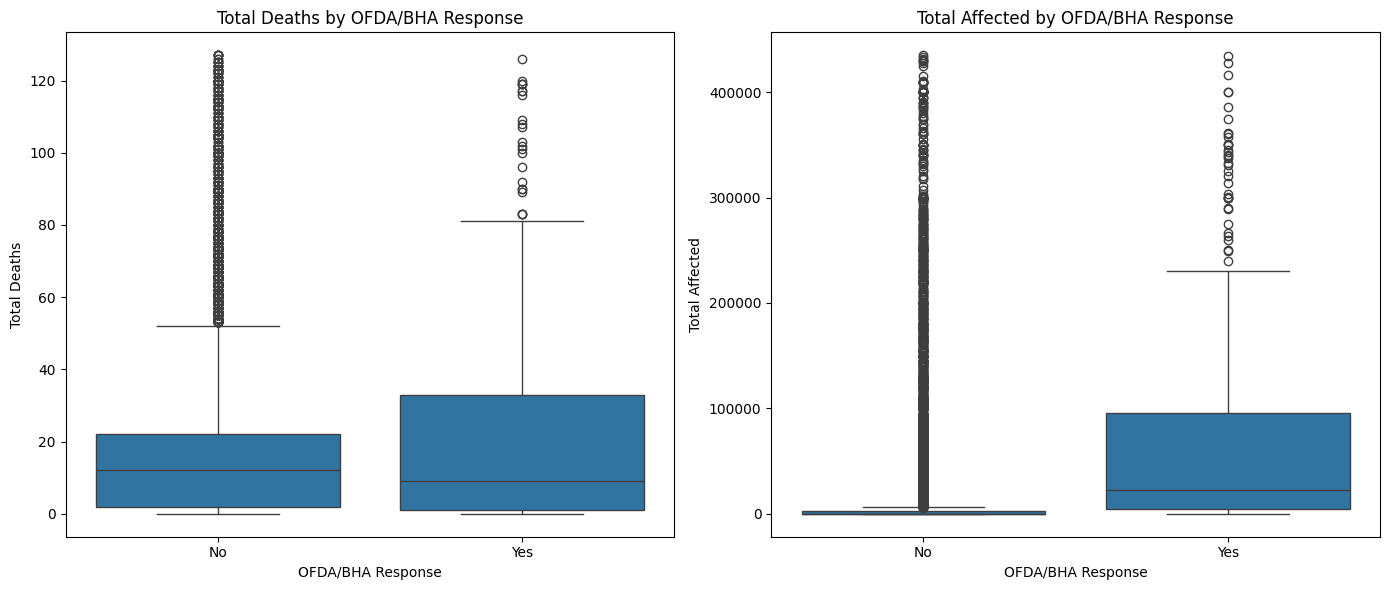

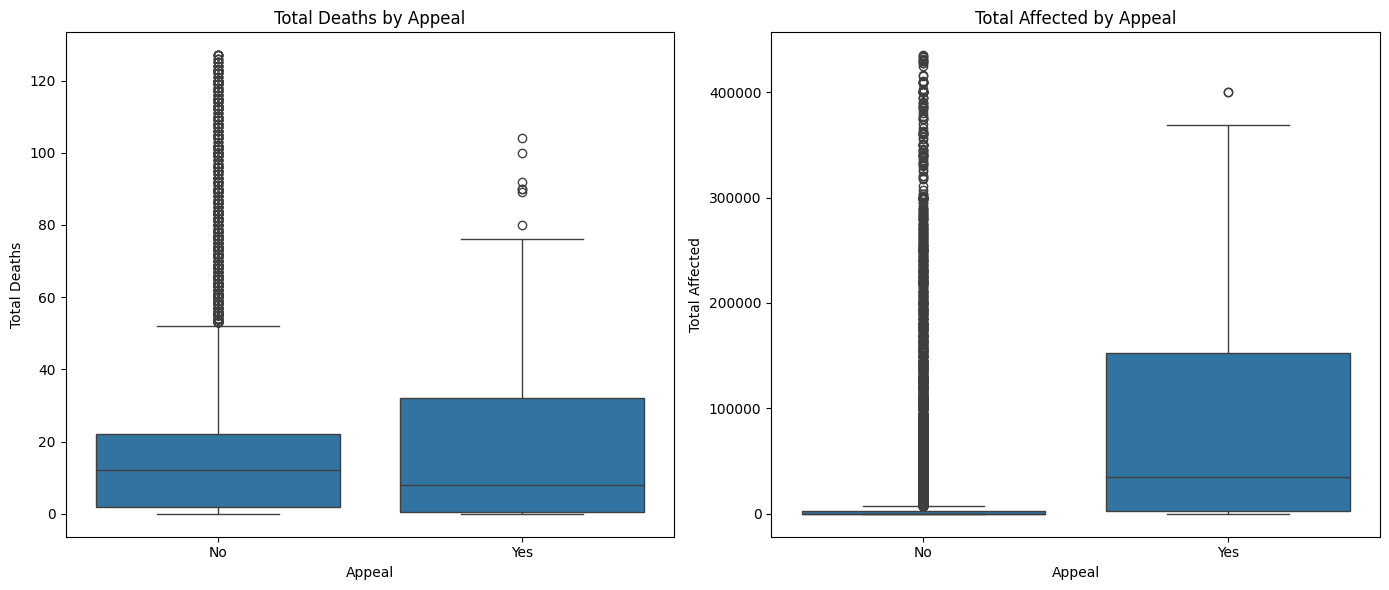

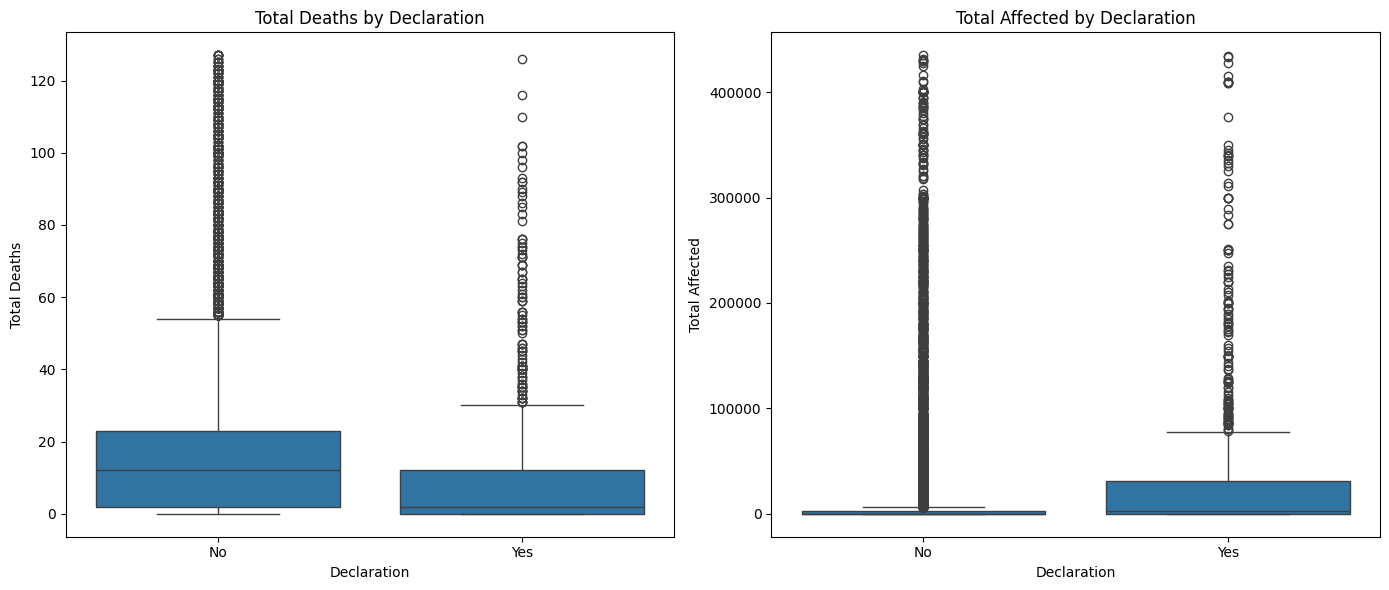

In [4]:
# Plot Total Deaths and Total Affected by administrative responses
plot_administrative_responses(cleaned_data)

### Notes:
- Box plots are used to compare the distributions of `Total Deaths` and `Total Affected` across different response types.
- These plots help visualize the central tendency and spread of the data for each category of response.
- Let’s analyze the boxplot for “Total Deaths by OFDA/DHA Response”:

This boxplot is comparing the total deaths when there is an OFDA/DHA response (“Yes”) versus when there isn’t (“No”).

No Response : The box for “No” is quite compact, indicating that the interquartile range (the range between the 25th percentile and the 75th percentile) is small. The median (the line inside the box) is close to zero, suggesting that in most cases where there is no OFDA/DHA response, the total deaths are low. However, there are several outliers that extend up to around 120.
With Response (Yes) : The box for “Yes” is slightly larger, indicating that the interquartile range is a bit wider. The median is also close to zero, but slightly higher than for “No”. There are also several outliers that extend significantly above the box.
This suggests that while most OFDA/DHA responses are associated with a low number of deaths, similar to when there is no response, there are instances where an OFDA/DHA response coincides with a higher death toll, as indicated by the outliers.

---

## 4. Comparative Analysis by Region

We will compare the disaster outcomes by region to understand if and how the impact varies across different geographical areas.

In [5]:
# Compare Total Deaths by Region
compare_by_region(cleaned_data)

## 5. Statistical Testing

We will perform t-tests to determine if there are statistically significant differences in the outcomes (Total Deaths, Total Affected) based on the presence or absence of administrative responses.

In [6]:
# Perform t-tests for administrative responses
t_test_results = t_test_response(cleaned_data)
print("T-test Results:")
print(t_test_results)

{'OFDA/BHA Response': {'Total Deaths': (2.6275003875041385, 0.008796532933334848), 'Total Affected': (3.750178675037367, 0.00019126131483764326)}, 'Appeal': {'Total Deaths': (1.5294026089885377, 0.12800111006715814), 'Total Affected': (2.7422838817248856, 0.006730449378050621)}, 'Declaration': {'Total Deaths': (1.355055686157893, 0.17568018545327535), 'Total Affected': (1.824599675238018, 0.06834052071882044)}}
T-test Results:
{'OFDA/BHA Response': {'Total Deaths': (2.6275003875041385, 0.008796532933334848), 'Total Affected': (3.750178675037367, 0.00019126131483764326)}, 'Appeal': {'Total Deaths': (1.5294026089885377, 0.12800111006715814), 'Total Affected': (2.7422838817248856, 0.006730449378050621)}, 'Declaration': {'Total Deaths': (1.355055686157893, 0.17568018545327535), 'Total Affected': (1.824599675238018, 0.06834052071882044)}}


### Notes:
- T-tests help assess whether the means of two groups are statistically different from each other.
- In this context, we compare the outcomes with and without specific administrative responses to understand their impact.
- If the t-statistic was 2.6, it would mean that the difference between the means of our two groups is 2.6 times larger compared to the variability within the groups.
- In our t-test example, the null hypothesis is that the means of 'Total Deaths' and 'Total Affected' are the same for groups with and without a certain administrative response. If the p-value associated with our t-test is small (typically less than 0.05), we can reject this null hypothesis and conclude that there is a significant difference.

---

## 6. Regression Analysis

Finally, we will perform regression analysis to quantify the effect of different administrative responses on the outcomes of natural disasters.

In [7]:
selected_features = ['OFDA/BHA Response', 'Region']  # Example of simplified features
simplified_model = sample_and_regress(cleaned_data, selected_features)

Simplified Regression Analysis:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     22.99
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           4.44e-23
Time:                        09:37:29   Log-Likelihood:            -1.4758e+05
No. Observations:               15801   AIC:                         2.952e+05
Df Residuals:                   15795   BIC:                         2.952e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Notes:
- Regression analysis provides a quantitative measure of how different administrative responses influence the outcomes.
- We use multiple linear regression to account for multiple variables and understand their individual effects on the disaster outcomes.
- The model attempted to predict ‘Total Deaths’ using ‘OFDA/BHA Response’, ‘Region_Americas’, ‘Region_Asia’, ‘Region_Europe’, and ‘Region_Oceania’ as predictors.

- The variable ‘OFDA/BHA Response_Yes’ was found to be statistically significant in predicting ‘Total Deaths’, as its p-value was less than 0.05. This suggests that the presence of an OFDA/BHA response is associated with a change in ‘Total Deaths’.
- The variable ‘Region_Asia’ was also found to be statistically significant in predicting ‘Total Deaths’. This suggests that being in the ‘Asia’ region is associated with a change in ‘Total Deaths’.
-The variables ‘Region_Americas’, ‘Region_Europe’, and ‘Region_Oceania’ were not found to be statistically significant in predicting ‘Total Deaths’, as their p-values were greater than 0.05. This suggests that being in these regions is not associated with a significant change in ‘Total Deaths’.
- However, the R-squared value of the model is 0.007, which means that only 0.7% of the variability in ‘Total Deaths’ can be explained by these predictors. This suggests that there may be other important factors not included in the model that influence ‘Total Deaths’.

---

## Conclusion for administrative analysis

This notebook provides a comprehensive analysis of how administrative responses impact the outcomes of natural disasters. We explored the data, visualized key relationships, and conducted statistical and regression analyses to draw insights.

### Further Steps:
- You can extend the analysis to include other variables or conduct more detailed regional studies.
- Consider using more advanced modeling techniques or machine learning algorithms for deeper insights.

---

Feel free to modify and expand the notebook to suit your research needs.
Needed libraries : 
- pandas
- argparse
- openpyxl
- seaborn
- scipy
- statsmodels
- scikit-learn
- plotly

---
Testing command : python -m unittest discover -s test/test_administrative_responses -p "test_*.py"

---
CLI commands :
- python src/helper_functions.py load --input data/rse.xlsx
- python src/helper_functions.py preprocess --input data/rse.xlsx --output results/my_preprocessed_data.xlsx
- python src/helper_functions.py clean --input data/rse.xlsx --output results/my_cleaned_data.xlsx
- python src/administrative_responses/describe_data.py --input results/clean_data.xlsx
- python src/administrative_responses/plot_administrative_responses.py --input results/clean_data.xlsx --output results/admin_responses_plot.png
- python src/administrative_responses/compare_by_region.py --input results/preprocessed_data.xlsx --output results/region_comparison.png
- python src/administrative_responses/t_test_response.py --input results/preprocessed_data.xlsx 
- python src/administrative_responses/sample_and_regress.py --input results/preprocessed_data.xlsx --selected_features "OFDA/BHA Response" "Region" "Disaster Type" --target_variable "Total Affected" --output results/regression_summary.txt

---




# Geological Analysis

In this section of the notebook, we will conduct a comprehensive geological analysis of natural disasters across various regions and disaster types.
We will focus on the following questions:

- Which geographic regions are most prone to specific types of natural disasters, such as earthquakes? How do geological and meteorological factors contribute to this vulnerability?
- Which types of natural disasters are occurring more frequently? How is climate variability influencing the frequency and intensity of these disasters?

---

## Loading and Cleaning the Data
First, let's load and clean our data!

In [ ]:
# Define the file path to the data
file_path = '../data/rse.xlsx'

# Load the data
data = load_data(file_path)

# Pre-process the data
data = data_preprocessing(file_path)

# Clean the data
cleaned_data = clean_data(data)

# Display the first few rows of the cleaned data to verify
cleaned_data.head()

NameError: name 'load_data' is not defined

---
### Geographic Regions Prone to Specific Types of Natural Disasters
#### Geological and Meteorological Contributions to Vulnerability

In this section, we will visualize and explore the geographic regions that are most prone to specific types of natural disasters, beginning with earthquakes and volcanic activity. 

In [ ]:
draw_choropleth_map(cleaned_data, 'Earthquake', 'Earthquake prone Regions', 'Reds')
draw_choropleth_map(cleaned_data, 'Volcanic activity', 'Volcanic activity prone Regions', 'Oranges')

NameError: name 'draw_choropleth_map' is not defined

As you can see, Earthquakes and Volcanic activities are prone to certain countries like Japan, Indonesia, and Chile. 
To understand this further, let's dive a little deeper to see if there is any correlations with geological and/or meteorological factors.

In [ ]:
plot_animated_earthquakes(cleaned_data)

NameError: name 'plot_animated_earthquakes' is not defined

![nn](..//data/img/Ring_of_Fire.png)

[Ring of Fire](https://en.wikipedia.org/wiki/Orogenic_belt#/media/File:Pacific_Ring_of_Fire.png)

It can be seen that Over the past 20 years, earthquakes of magnitude 6.5 or greater have frequently occurred in the Pacific Ring orogenic belt also known as Pacific Ring of Fire, located on the outer edge of the Pacific Ocean. This includes regions such as Japan, Indonesia, and Chile. Additionally, large earthquakes often occur around the Alpine-Himalayan orogenic belt, which stretches from Asia to European countries.
These areas are particularly susceptible due to their location along tectonic plate boundaries, where plates collide, slide past each other, or pull apart. 

An orogenic belt, also known as an orogen or a fold belt, is a region of the Earth's crust where mountains are formed through the process of orogeny. Orogeny refers to the structural deformation and metamorphism of the Earth's lithosphere due to tectonic plate interactions, typically involving the collision, subduction, or convergence of tectonic plates. These regions experience significant tectonic activity, including earthquakes, volcanic activity, and the folding and faulting of rock layers.

How about other disasters?

In [ ]:
draw_choropleth_map(cleaned_data, 'Drought', 'Drought prone Regions', 'Reds')

NameError: name 'draw_choropleth_map' is not defined

As you can see, Droughts are prone to certain regions, such as Sub-Saharan Africa (e.g., Ethiopia, Somalia), the Southwestern United States (e.g., California, Arizona), and the Middle East (e.g., Saudi Arabia, Iran). These areas are more susceptible due to specific climatic conditions, as regions with arid or semi-arid climates are particularly prone to drought. Additionally, precipitation patterns play a crucial role, with areas experiencing low and irregular rainfall being more vulnerable. Higher temperatures also contribute to drought by increasing evaporation rates, which reduces water availability. Moreover, human activities, such as the overuse of water resources for agriculture and industry, can exacerbate drought conditions in these regions.

In [ ]:
draw_choropleth_map(cleaned_data, 'Wildfire', 'Wildfire prone Regions', 'Reds')

NameError: name 'draw_choropleth_map' is not defined

Wildfires are prone to certain regions, such as the Western United States (e.g., California, Oregon), southeastern Australia, Mediterranean Europe (e.g., Greece, Italy), and Brazil (Amazon Rainforest). These areas are particularly susceptible due to several factors. The climate in these regions is typically hot and dry with low humidity, which creates ideal conditions for wildfires. Additionally, the presence of dense forests, brush, and grasslands provides ample fuel for fires to spread. Weather conditions, including prolonged periods of drought and high winds, further exacerbate the risk. Human activity also plays a significant role, with land use changes, agricultural practices, and accidental or intentional ignitions contributing to the frequency and severity of wildfires in these regions.

![nn](..//data/img/Arid_climate_world_map.png)

[Arid climate world map](https://upload.wikimedia.org/wikipedia/commons/b/b1/Arid_climate_world_map%2C_classification_UNEP_%282023%29.png)

There are notable commonalities between regions prone to wildfires and those susceptible to droughts. Both types of natural disasters are often found in areas with arid or semi-arid climates and low and irregular rainfall, such as the Southwestern United States and parts of Australia. Higher temperatures and prolonged periods of drought increase the risk for both droughts and wildfires. Additionally, human activities, such as the overuse of water resources for agriculture and industry, can exacerbate both drought and wildfire conditions.

In [ ]:
draw_choropleth_map(cleaned_data, 'Flood', 'Flood prone Regions', 'Blues')

NameError: name 'draw_choropleth_map' is not defined

Floods are prone to certain regions, such as South Asia (e.g., Bangladesh, India), Southeast Asia (e.g., Thailand, Vietnam), and Eastern United States (e.g., Mississippi River Basin). These areas are particularly susceptible due to several factors. Heavy rainfall and monsoons significantly contribute to flooding in these regions. Additionally, the topography of low-lying areas and river basins makes them more vulnerable to flooding. Climate change also plays a critical role, with rising sea levels and increased rainfall intensity leading to a higher likelihood of floods.

In [ ]:
draw_choropleth_map(cleaned_data, 'Storm', 'Storm prone Regions', 'Blues')

NameError: name 'draw_choropleth_map' is not defined

![nn](..//data/img/Map_of_El_Nino_related_rainfall.png)

[Map of El Niño related rainfall](https://www.researchgate.net/profile/Ivan-Ramirez-9/publication/341464054/figure/fig1/AS:892642539872258@1589833974550/Map-of-El-Nino-related-rainfall-patterns-in-various-locations-around-the-globe-Source.png)

Storms are prone to certain regions, such as the Southeastern United States (e.g., Gulf Coast), the Caribbean (e.g., Bahamas, Puerto Rico), Southeast Asia (e.g., Philippines, Vietnam), and Eastern Asia (e.g., Japan, China). These areas are particularly susceptible due to several factors. Warm ocean waters fuel tropical storms and hurricanes, making ocean temperature a critical factor. Meteorological patterns, such as monsoon seasons, El Niño, and La Niña, also influence storm activity. Additionally, coastal regions are more vulnerable to storms due to their proximity to storm paths.

# Summary
In summary, different regions around the world are prone to specific types of natural disasters due to a combination of geological and meteorological factors. Droughts are prevalent in arid and semi-arid regions like Sub-Saharan Africa, the Southwestern United States, Central Australia, and the Middle East. Wildfires are common in the Western United States, southeastern Australia, Mediterranean Europe, and the Amazon Rainforest, often exacerbated by prolonged drought conditions and human activities. Earthquakes frequently occur along tectonic plate boundaries and fault lines, affecting countries such as Japan, the United States, Chile, Turkey, and New Zealand. Floods are a significant risk in South Asia, Southeast Asia, the Eastern United States, driven by heavy rainfall, topography, urbanization, and climate change. Storms, including tropical storms and hurricanes, impact the Southeastern United States, the Caribbean, Southeast Asia, and Eastern Asia, fueled by warm ocean waters and influenced by meteorological patterns.

Understanding the susceptibility of these regions to natural disasters helps in developing better preparedness and mitigation strategies, ultimately reducing the impact on human lives and infrastructure.

---
## Increasing Frequency of Natural Disasters
### The Influence of Climate Variability on Disaster Occurrence?

As we have seen earlier, certain types of natural disasters are often caused by climate change. To fully comprehend the impact of climate variability on the frequency of these disasters, it is essential to delve into the specific ways in which different regions around the world are affected. By examining regional data, we can identify patterns and trends that reveal which types of natural disasters have seen a significant increase due to climatic shifts.

In [ ]:
changes_df = calculate_natural_disaster_changes(cleaned_data, years_past=20)
print(changes_df)

NameError: name 'calculate_natural_disaster_changes' is not defined

As evident from the chart, there has been a notable increase in the frequency of disasters such as storms and floods over recent years compared to the past. This trend highlights a concerning rise in the occurrence of these natural calamities, suggesting that they are becoming more frequent and potentially more severe. 

In [ ]:
plot_disaster_trend(cleaned_data, 'Flood')

NameError: name 'plot_disaster_trend' is not defined

In [ ]:
plot_disaster_trend(cleaned_data, 'Storm')

NameError: name 'plot_disaster_trend' is not defined

As we can observe, the frequency of floods and storms has been increasing over recent years. This trend highlights a concerning rise in the occurrence of these natural calamities, indicating that they are not only becoming more frequent but also potentially more severe. The data suggests a shift in patterns, where these events are occurring with greater regularity, posing significant risks to both human life and property.

This upward trend in the frequency and intensity of floods and storms can be attributed to a variety of factors. Climate change, with its associated impacts such as rising global temperatures, changes in precipitation patterns, and increasing sea levels, plays a significant role in exacerbating these natural disasters. As the atmosphere warms, it holds more moisture, leading to heavier and more prolonged rainfall, which in turn results in more frequent and severe flooding. Similarly, warmer ocean temperatures can intensify storms, making them more powerful and destructive.

The increased occurrence of these disasters also underscores the importance of improving our preparedness and response strategies. Communities, particularly those in vulnerable regions, need to invest in robust infrastructure, effective early warning systems, and comprehensive disaster management plans to mitigate the impact of these increasingly common events. Additionally, addressing the root causes, such as reducing greenhouse gas emissions and implementing sustainable land-use practices, is crucial for curbing the long-term trends of these natural disasters.


In summary, the rising frequency of floods and storms is a clear indication of the changing nature of our environment. This trend not only highlights the growing severity of these events but also calls for urgent action to enhance resilience and adapt to the new realities brought about by climate change.

---

## Conclusion
The analysis focused on identifying the regions most prone to specific natural disasters, understanding how climate variability influences the frequency of these disasters, and examining the trends over the past decades.
### Key Findings:
1. Regional Proneness to Natural Disasters: 
- Earthquakes: The Pacific Ring of Fire, including countries such as Japan, Indonesia, and Chile, emerged as the most earthquake-prone region due to its location along major tectonic plate boundaries.
- Floods: South Asian countries like India and Bangladesh, as well as parts of North America frequently experienced severe flooding. These regions are heavily influenced by monsoon variability and changes in precipitation patterns.
- Droughts: Sub-Saharan Africa, Australia, and the Western United States were identified as regions highly susceptible to droughts. Changes in monsoon patterns, El Niño events, and prolonged high-pressure systems significantly contributed to these droughts.
- Wildfires: California and the Western United States, Australia, and the Mediterranean region showed a marked increase in wildfire occurrences due to higher temperatures, prolonged droughts, and changes in vegetation patterns.

2. Impact of Climate Variability, trends and Changes Over Time:
- The analysis of trends over the past decades revealed that many natural disasters are occurring with greater frequency and intensity. This is particularly evident in the case of  floods and Storms.


In conclusion, the findings of this project emphasize the significant role of climate variability in influencing the frequency and intensity of natural disasters. As climate change continues to pose unprecedented challenges, it is imperative to strengthen global efforts in disaster risk reduction, climate adaptation, and resilience building to safeguard communities and ecosystems from the increasing threats of natural disasters.

---